
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [2]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd

% matplotlib inline

np.random.seed(42)
_N_ = 1000
_times_ = 1000

def pearson_generator (vector_length, times, x_loc=0, x_scale=1, y_loc=0, y_scale=1):
    N = vector_length
    r_xy = np.zeros(times)
    for i in range(times):
        x = np.random.normal (loc=x_loc, scale=x_scale, size=N)
        y = np.random.normal (loc=y_loc, scale=y_scale, size=N)
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        S_x = 1./(N-1) * np.sum((x-x_mean)**2)
        S_y = 1./(N-1) * np.sum((y-y_mean)**2)
        r_xy[i] = 1./N * np.sum((x-x_mean)*(y-y_mean)) / np.sqrt(S_x*S_y)
    return r_xy

def pearson_calculator (x, y):
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    S_x = 1./(N-1) * np.sum((x-x_mean)**2)
    S_y = 1./(N-1) * np.sum((y-y_mean)**2)
    r_xy = 1./N * np.sum((x-x_mean)*(y-y_mean)) / np.sqrt(S_x*S_y)
    return r_xy

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.

r_xy = pearson_generator (_N_, 1)

print('Pearson correlation coefficient is r_xy = %.3f' % (r_xy))

Pearson correlation coefficient is r_xy = -0.040


In [3]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.

r_xy = pearson_generator (_N_, _times_)

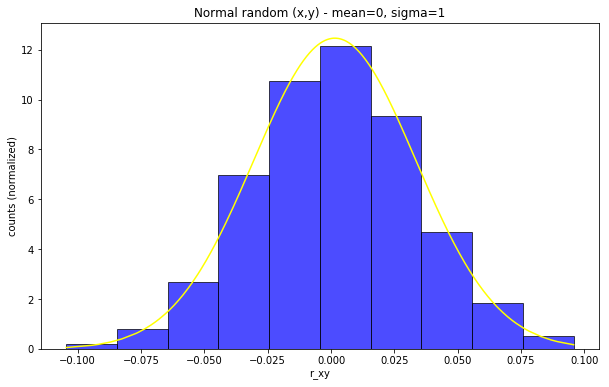

In [4]:
#3) Plot a histogram of your  $r_{xy}$ values.

plt.figure(figsize=(10,6))
plt.hist(r_xy, color='blue', edgecolor='black', alpha=0.7, normed=True)
Gauss_x = np.sort(r_xy)
Gauss_y = ss.norm.pdf(Gauss_x, loc=np.mean(r_xy), scale=np.sqrt(np.var(r_xy)))
plt.plot(Gauss_x, Gauss_y, color='yellow')
plt.xlabel('r_xy')
plt.ylabel('counts (normalized)')
plt.title('Normal random (x,y) - mean=0, sigma=1')
plt.show()

In [5]:
#4) What is the fraction of times |rxy| is larger than 0.025, 0.05, 0.08?
# Would you expect to get this value if there were no correlation?
# Calculate the rxy for the homework set homework_01_2d-datafile.csv? Would you expect to get this value if there were no correlation?

r_xy_25 = np.sum (abs(r_xy) > 0.025)
r_xy_5 = np.sum (abs(r_xy) > 0.05)
r_xy_8 = np.sum (abs(r_xy) > 0.08)

f_25 = float(r_xy_25/len(r_xy))
f_5 = float(r_xy_5/len(r_xy))
f_8 = float(r_xy_8/len(r_xy))

print ('The fractions of times |r_xy| is larger than 0.025, 0.05, 0.08 are, respectively: %.3f, %.3f, %.3f' % (f_25, f_5, f_8))

df = pd.read_csv('homework_01_2d-datafile.csv', index_col=0)

x_hom = df['X']
y_hom = df['Y']

r_xy_hom = pearson_calculator (x_hom, y_hom)

print('Homework data show r_xy = %.3f and this is fine, because they are quite well correlated' % (r_xy_hom))

The fractions of times |r_xy| is larger than 0.025, 0.05, 0.08 are, respectively: 0.447, 0.121, 0.010
Homework data show r_xy = 0.948 and this is fine, because they are quite well correlated


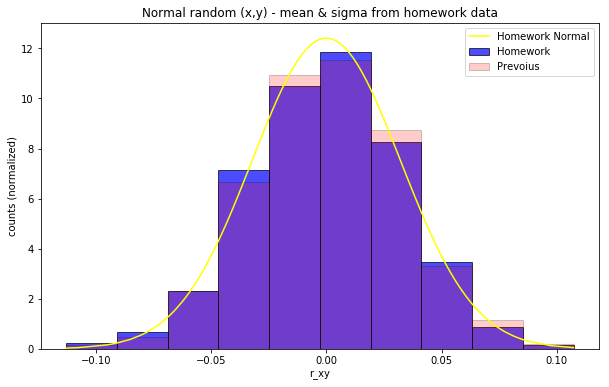

There's no difference


In [6]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?

x_hom_mean = np.mean(x_hom)
x_hom_sigma = np.sqrt(np.var(x_hom))

y_hom_mean = np.mean(y_hom)
y_hom_sigma = np.sqrt(np.var(y_hom))

r_xy_hom_rand = pearson_generator (_N_, _times_, x_hom_mean, x_hom_sigma, y_hom_mean, y_hom_sigma)

plt.figure(figsize=(10,6))

shit, bins, shits = plt.hist(r_xy_hom_rand, color='blue', edgecolor='black', alpha=0.7, normed=True, label='Homework')
plt.hist(r_xy, color='red', edgecolor='black', alpha=0.2, normed=True, bins=bins, label='Prevoius')

Gauss_x_hom = np.sort(r_xy_hom_rand)
Gauss_y_hom = ss.norm.pdf(Gauss_x_hom, loc=np.mean(r_xy_hom_rand), scale=np.sqrt(np.var(r_xy_hom_rand)))
plt.plot(Gauss_x_hom, Gauss_y_hom, color='yellow', label='Homework Normal')

plt.xlabel('r_xy')
plt.ylabel('counts (normalized)')
plt.title('Normal random (x,y) - mean & sigma from homework data')
plt.legend()

plt.show()

print("There's no difference")

In [7]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?

p = 0.95
r_xy_sorted = np.sort(r_xy)
index = int(p*len(r_xy))
r_xy_mean = np.mean(r_xy)
r_xy_scale = np.sqrt(np.var(r_xy))

var_r095 = 2*p*(1-p) / len(r_xy) / (ss.norm.pdf(r_xy_sorted[index], loc=r_xy_mean, scale=r_xy_scale))**2

print('The value of r_0.95 is %.3f and its variance is %.3e' % (r_xy_sorted[index], var_r095))

The value of r_0.95 is 0.055 and its variance is 1.040e-05


Spearman correlation coefficient for random numbers is sr_xy = 0.016
Kendall correlation coefficient for random numbers is kt_xy = -0.001


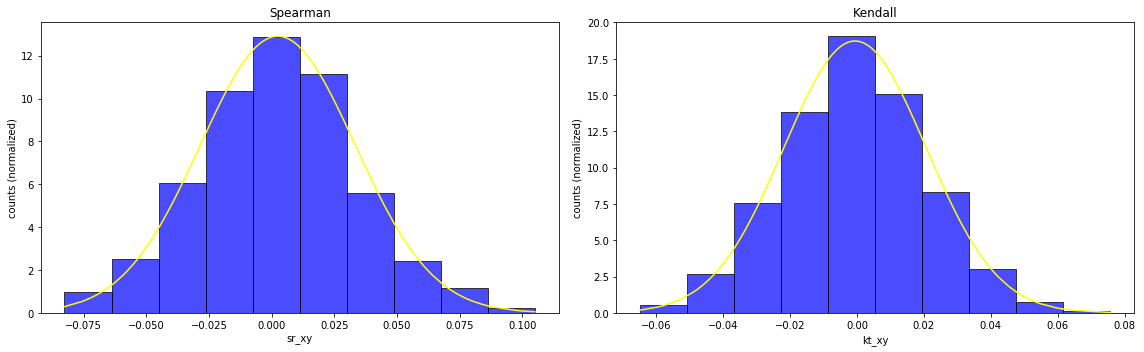

Spearman correlation coefficient for homework data is 0.940
Kendall correlation coefficient for homework data is 0.792


In [10]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?

def spearman_generator (vector_length, times, x_loc=0, x_scale=1, y_loc=0, y_scale=1):
    N = vector_length
    sr_xy = np.zeros(times)
    for i in range(times):
        x = np.random.normal (loc=x_loc, scale=x_scale, size=N)
        y = np.random.normal (loc=y_loc, scale=y_scale, size=N)
        sr_xy[i], p_val = ss.spearmanr(x, y)
    return sr_xy

def kendall_generator (vector_length, times, x_loc=0, x_scale=1, y_loc=0, y_scale=1):
    N = vector_length
    kt_xy = np.zeros(times)
    for i in range(times):
        x = np.random.normal (loc=x_loc, scale=x_scale, size=N)
        y = np.random.normal (loc=y_loc, scale=y_scale, size=N)
        kt_xy[i], p_val = ss.kendalltau(x, y)
    return kt_xy

sr_xy = spearman_generator (_N_, 1)
kt_xy = kendall_generator (_N_, 1)

print('Spearman correlation coefficient for random numbers is sr_xy = %.3f' % (sr_xy))
print('Kendall correlation coefficient for random numbers is kt_xy = %.3f' % (kt_xy))

plt.figure(figsize=(16,5))

sr_xy = spearman_generator (_N_, _times_)

plt.subplot(1,2,1)
plt.hist(sr_xy, color='blue', edgecolor='black', alpha=0.7, normed=True)
sGauss_x = np.sort(sr_xy)
sGauss_y = ss.norm.pdf(sGauss_x, loc=np.mean(sr_xy), scale=np.sqrt(np.var(sr_xy)))
plt.plot(sGauss_x, sGauss_y, color='yellow')
plt.xlabel('sr_xy')
plt.ylabel('counts (normalized)')
plt.title('Spearman')

kt_xy = kendall_generator (_N_, _times_)

plt.subplot(1,2,2)
plt.hist(kt_xy, color='blue', edgecolor='black', alpha=0.7, normed=True)
kGauss_x = np.sort(kt_xy)
kGauss_y = ss.norm.pdf(kGauss_x, loc=np.mean(kt_xy), scale=np.sqrt(np.var(kt_xy)))
plt.plot(kGauss_x, kGauss_y, color='yellow')
plt.xlabel('kt_xy')
plt.ylabel('counts (normalized)')
plt.title('Kendall')

plt.tight_layout()
plt.show()

sr_xy_hom, sp_val_hom = ss.spearmanr(x_hom, y_hom)
kt_xy_hom, kp_val_hom = ss.kendalltau(x_hom, y_hom)

print('Spearman correlation coefficient for homework data is %.3f' % sr_xy_hom)
print('Kendall correlation coefficient for homework data is %.3f' % kt_xy_hom)